In [46]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.python.ops import array_ops

from influence.plot_utils import show_graph
from models.smooth_hinge import SmoothedSupportVector

In [68]:
df = pd.read_csv('data/digits_14.csv')[:1000]
n = len(df)
X = df.values[:, 0:256]
y = df.values[:, -1].reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)
n, p = X_train.shape

(600, 256)
(400, 256)
(600, 1)
(400, 1)


In [69]:
tf.reset_default_graph()
model = SmoothedSupportVector(
    model_name='SVM',
    eta=0.05,
    C=1.0,
    t=0.1
)
model.fit(X_train, y_train, n_iter=10000)

Step 0: loss = 4.08194590 (0.102 sec)
Step 1000: loss = 0.00157738 (0.001 sec)
Step 2000: loss = 0.00157732 (0.001 sec)
Step 3000: loss = 0.01940400 (0.001 sec)
Step 4000: loss = 0.00157732 (0.001 sec)
Step 5000: loss = 0.00157732 (0.001 sec)
Step 6000: loss = 0.00157732 (0.001 sec)
Step 7000: loss = 0.00157732 (0.001 sec)
Step 8000: loss = 0.00157732 (0.001 sec)
Step 9000: loss = 0.01237477 (0.001 sec)


SVM(eta=0.05,C=1.0,t=0.1)

In [70]:
y_train_pred = model.predict(X_train)
print(np.mean(y_train_pred == y_train))

y_test_pred = model.predict(X_test)
print(np.mean(y_test_pred == y_test))

1.0
0.9925


In [73]:
%%time
I_loss_bf = model.influence_loss(
    X_test, y_test, method='brute-force')

Fetch training loss gradients (0.508 sec)
CPU times: user 1.17 s, sys: 146 ms, total: 1.31 s
Wall time: 990 ms


In [71]:
%%time
I_loss_loo = model.leave_one_out_refit(
    X_test, y_test, n_iter=1000, force_restart=0)

LOO Fold 0: loss = 0.00157768 (1.195 sec)
LOO Fold 60: loss = 0.00157768 (1.065 sec)
LOO Fold 120: loss = 0.00741973 (1.132 sec)
LOO Fold 180: loss = 0.00157768 (1.179 sec)
LOO Fold 240: loss = 0.00157768 (0.941 sec)
LOO Fold 300: loss = 0.00157768 (1.184 sec)
LOO Fold 360: loss = 0.00157768 (1.202 sec)
LOO Fold 420: loss = 0.00157768 (1.289 sec)
LOO Fold 480: loss = 0.00157768 (1.430 sec)
LOO Fold 540: loss = 0.00157768 (1.454 sec)
CPU times: user 15min 19s, sys: 1min 31s, total: 16min 50s
Wall time: 12min 21s


In [ ]:
"""
I_loss_bf_one_pt = I_loss_bf[:,j]/(-n_tr)
I_loss_loo_one_pt = I_loss_loo[:,j]
df_temp = pd.DataFrame({
    'loo':I_loss_loo_one_pt, 
    'influence': I_loss_bf_one_pt})

ub, lb = df_temp.loo.quantile(.8), df_temp.loo.quantile(.2)
df_temp_trunc = df_temp[(df_temp.loo < ub) & (df_temp.loo > lb)]
"""

In [74]:
abs_pct_error = 100*np.abs(
    I_loss_bf/(-n_tr) - I_loss_loo) / np.abs(I_loss_loo)
print("Absolute percentage error to closed form:")
for row in abs_pct_error:
    print([('%.3f' % x) + '%' for x in row])

/Users/zed/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Absolute percentage error to closed form:
['10.673%', '10.742%', '10.579%', '14.694%', '10.742%', '10.742%', '13.626%', '10.742%', '10.742%', '17.350%', '10.736%', '10.742%', '10.742%', '10.742%', '10.742%', '10.742%', '10.741%', '10.742%', '10.726%', '20.265%', '10.742%', '10.742%', '10.741%', '10.677%', '10.725%', '10.741%', '18.033%', '41.117%', '10.719%', '10.737%', '14.511%', '10.742%', '10.715%', '10.724%', '10.741%', '10.740%', '10.742%', '10.664%', '10.650%', '10.742%', '10.501%', '10.742%', '10.738%', '10.742%', '10.742%', '10.742%', '10.728%', '12.313%', '10.484%', '10.720%', '10.740%', '10.741%', '10.741%', '15.185%', '10.742%', '79.323%', '10.736%', '10.741%', '10.742%', '10.742%', '15.212%', '22.933%', '13.260%', '10.742%', '2819.976%', '10.742%', '10.742%', '10.742%', '10.741%', '10.644%', '10.742%', '10.738%', '10.742%', '10.742%', '10.742%', '10.740%', '25.888%', '10.355%', '10.742%', '10.742%', '10.742%', '10.742%', '10.689%', '10.742%', '10.537%', '10.739%', '10.742%'

['12.288%', '12.361%', '12.191%', '16.506%', '12.361%', '12.361%', '11.406%', '12.361%', '12.361%', '18.789%', '12.354%', '12.360%', '12.361%', '12.361%', '12.361%', '12.361%', '12.359%', '12.361%', '12.344%', '22.606%', '12.361%', '12.360%', '12.360%', '12.293%', '12.342%', '12.359%', '19.720%', '142.856%', '12.335%', '12.355%', '16.324%', '12.361%', '12.331%', '12.340%', '12.359%', '12.358%', '12.361%', '12.278%', '12.255%', '12.360%', '12.114%', '12.360%', '12.357%', '12.361%', '12.361%', '12.360%', '12.344%', '13.896%', '12.077%', '12.342%', '12.359%', '12.359%', '12.360%', '16.794%', '12.361%', '12.468%', '12.354%', '12.359%', '12.361%', '12.360%', '16.895%', '29.582%', '14.946%', '12.360%', '224.825%', '12.361%', '12.361%', '12.361%', '12.359%', '12.270%', '12.361%', '12.357%', '12.360%', '12.360%', '12.361%', '12.358%', '28.444%', '11.929%', '12.360%', '12.361%', '12.360%', '12.361%', '12.303%', '12.361%', '12.143%', '12.357%', '12.361%', '12.361%', '12.361%', '12.352%', '12.361

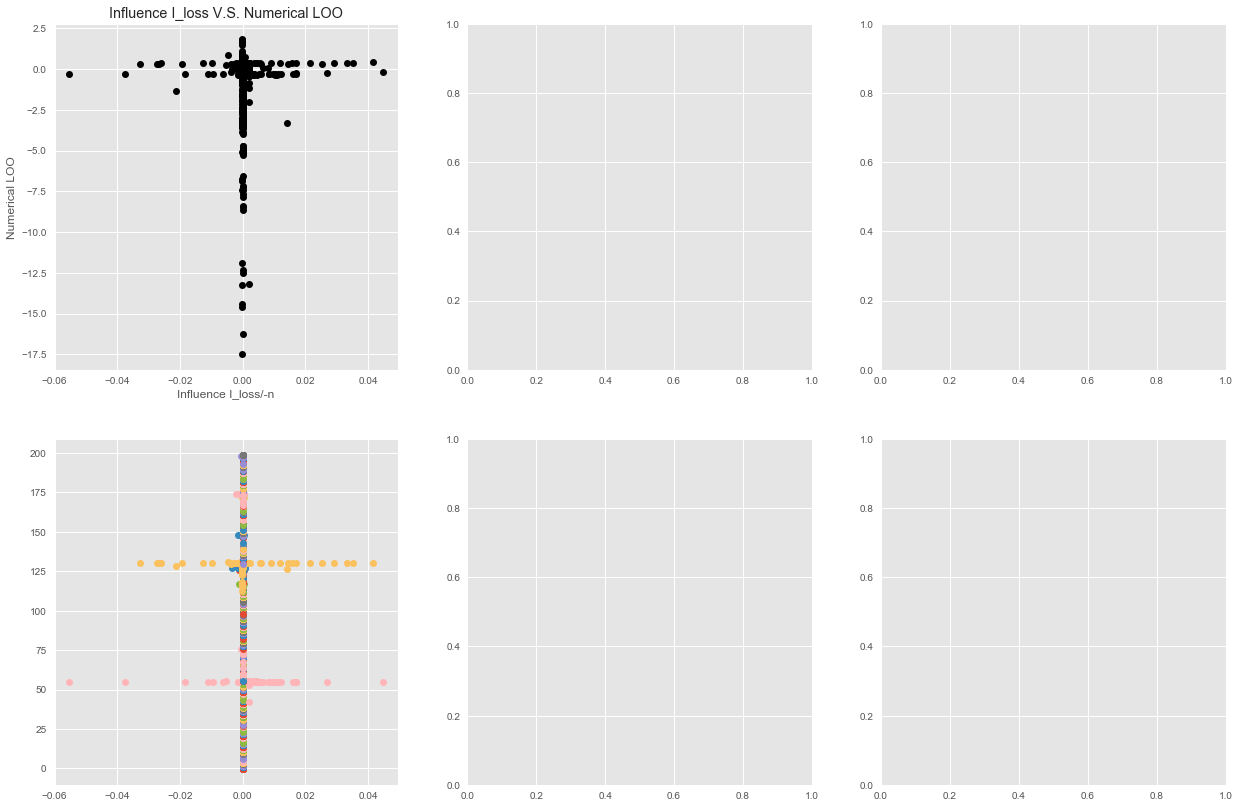

In [61]:
fig, axes = plt.subplots(2, 3 ,figsize=(21,14))
n_tr, _ = X_train.shape
n_te, _ = X_test.shape

#for j in [0]:
for j in range(n_te):

    axes[0,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j] , 
                 'o', color='black')    
    axes[1,0].plot(I_loss_bf[:,j]/(-n_tr), I_loss_loo[:,j] +j, 'o')
    #axes[0,0].set_xlim((-0.05,0.05))
    #axes[0,0].set_ylim((-0.05,0.05))
    
axes[0,0].update({
    'title':'Influence I_loss V.S. Numerical LOO',
    'xlabel': 'Influence I_loss/-n',
    'ylabel': 'Numerical LOO'})

1. Influence function是每个training point对于loss的变化 这个loss是